# Density Estimations

## Gaussian Mixture Models

**Gaussian Mixture Models** are an unsupervised clustering & density estimation technique.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.mixture import GaussianMixture
import seaborn as sns; sns.set()
%matplotlib inline

### Generate Data 

Imagine we have some one-dimensional data in a particular distribution

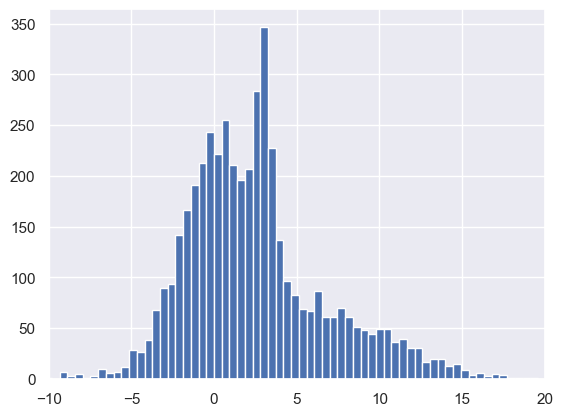

In [2]:
np.random.seed(2)
x = np.concatenate([np.random.normal(0, 2, 2000),
                    np.random.normal(5, 5, 2000),
                    np.random.normal(3, 0.5, 600)])
plt.hist(x, 80)
plt.xlim(-10, 20);

In [3]:
x.shape

(4600,)

In [4]:
f = np.ravel(x)
f=x.reshape(-1,1)
f.shape

(4600, 1)

### Build GMM

Gaussian mixture models will allow us to approximate this density:

In [5]:
# Fit GMM
gmm = GaussianMixture(n_components = 3).fit(f)

Note that this density is fit using a **mixture of Gaussians**, which we can examine by looking at the ``means_``, ``covars_``, and ``weights_`` attributes:

In [6]:
gmm.means_

array([[-0.69645339],
       [ 8.80095044],
       [ 2.54494806]])

In [7]:
gmm.covariances_

array([[[ 5.49618426]],

       [[12.55779104]],

       [[ 2.94131914]]])

In [8]:
gmm.weights_

array([0.41942445, 0.21149936, 0.36907619])

### Evaluate GMM

Plot histograms and gaussian curves

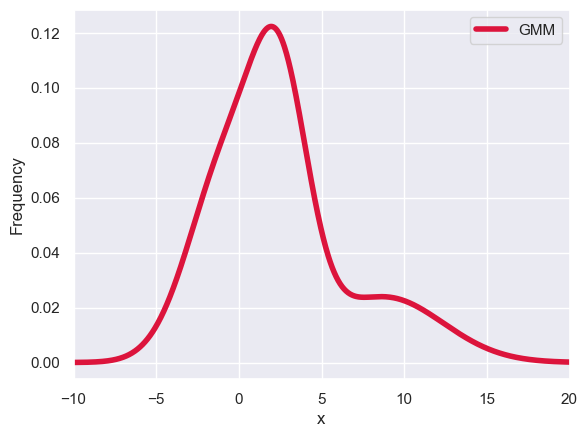

In [9]:
gmm_x = np.linspace(-10, 20, 1000)
gmm_y = np.exp(gmm.score_samples(gmm_x.reshape(-1,1)))

fig, ax = plt.subplots()
#ax.hist(f, 80)
ax.plot(gmm_x, gmm_y, color="crimson", lw=4, label="GMM")

ax.set_ylabel("Frequency")
ax.set_xlabel("x")
plt.xlim(-10, 20);
plt.legend()

plt.show()

These individual Gaussian distributions are fit using an expectation-maximization method, much as in K means, except that rather than explicit cluster assignment, the **posterior probability** is used to compute the weighted mean and covariance.
Somewhat surprisingly, this algorithm **provably** converges to the optimum (though the optimum is not necessarily global).

## How many Gaussians?

Given a model, we can use one of several means to evaluate how well it fits the data.
For example, there is the Aikaki Information Criterion (AIC) and the Bayesian Information Criterion (BIC)

The lower the BIC, the better is the model to actually predict the data we have, and by extension, the true, unknown, distribution

In [10]:
print(gmm.aic(f))
print(gmm.bic(f))

25885.965756347658
25937.436249007475


Let's take a look at these as a function of the number of gaussians:

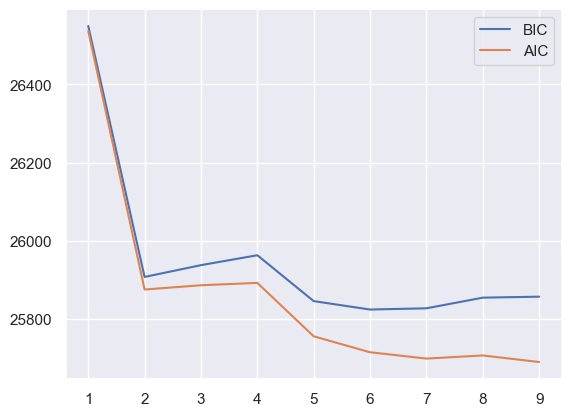

In [11]:
n_estimators = np.arange(1, 10)
clfs = [GaussianMixture(n).fit(f) for n in n_estimators]
bics = [clf.bic(f) for clf in clfs]
aics = [clf.aic(f) for clf in clfs]

plt.plot(n_estimators, bics, label='BIC')
plt.plot(n_estimators, aics, label='AIC')
plt.legend();

It appears that for both the AIC and BIC, 5 components is preferred.